In [1]:
# ref: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

import os, sys
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from os.path import join 

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import torch
import torchvision

print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.5.1
Torchvision Version:  0.6.1


In [2]:
DataPath = r'D:\GitWork\titanic\data'
OutPath  = r'D:\GitWork\titanic\output'

TrainFile  = 'train.csv'
TestFile   = 'test.csv'
SubmitFile = 'gender_submission.csv'

In [3]:
# Importing the data and displaying some rows
f_abspath = join(DataPath, TrainFile)
df_train = pd.read_csv(f_abspath)

display(df_train.info())
display(df_train.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
display(df_train.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_code'], dtype='object')


Text(0.5, 1.0, 'train feature corr')

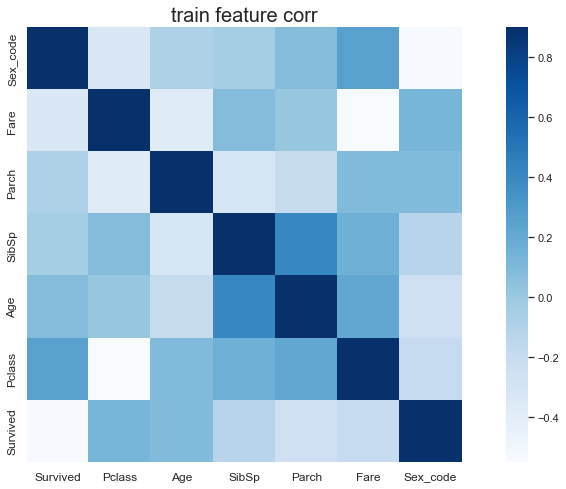

In [47]:
sns.set(context="paper", font="monospace")
sns.set(style="white")

font_size = 12

f, ax = plt.subplots(figsize=(16, 8))
train_corr = df_train.drop('PassengerId', axis=1).corr()
sns.heatmap(train_corr, ax=ax, vmax=.9, square=True, cmap="Blues")

ax.set_xticklabels(train_corr.index, size=font_size)

# va = verticalalignment, ha = horizontalalignment
ax.set_yticklabels(train_corr.columns[::-1], size=font_size, va='center')

ax.set_title('train feature corr', fontsize=20)

In [5]:
# Importing the data and displaying some rows
f_abspath = join(DataPath, TestFile)
df_test = pd.read_csv(f_abspath)

display(df_test.info())
display(df_test.head(10))

# Fill null of Fare
# Since only one fare is null, fill with mean value
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
print('\nFill fare null:')
display(df_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S



Fill fare null:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [49]:
display(df_test.describe())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_code
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.636364
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


Text(0.5, 1.0, 'train feature corr')

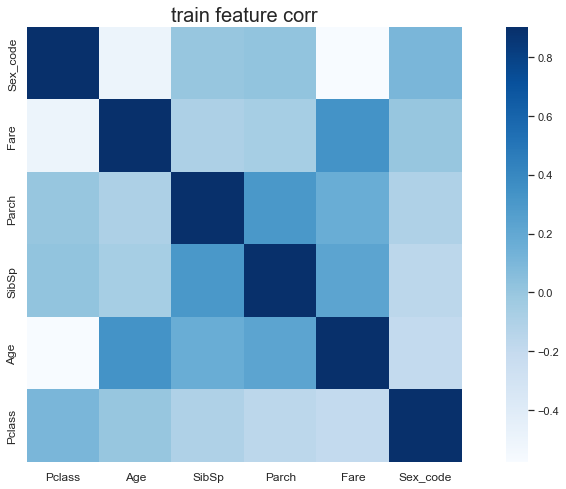

In [50]:
sns.set(context="paper", font="monospace")
sns.set(style="white")

font_size = 12

f, ax = plt.subplots(figsize=(16, 8))
train_corr = df_test.drop('PassengerId', axis=1).corr()

sns.heatmap(train_corr, ax=ax, vmax=.9, square=True, cmap="Blues")
ax.set_xticklabels(train_corr.index, size=font_size)
ax.set_yticklabels(train_corr.columns[::-1], size=font_size, va='center') # va = verticalalignment
ax.set_title('train feature corr', fontsize=20)

,Pclass,Survived
0,1,0.630
1,2,0.473
2,3,0.242


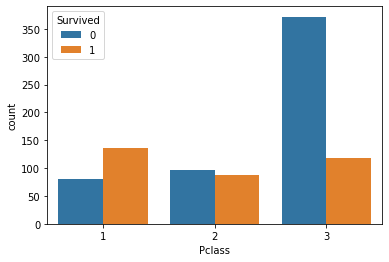

In [6]:
# Observed the relationship between surviced and Pclass
col_name = 'Pclass'
sns.countplot(df_train[col_name], hue=df_train['Survived'])
display(df_train[[col_name, 'Survived']].groupby([col_name], as_index=False).mean().round(3))

,Sex,Survived
0,female,0.742
1,male,0.189


Sex dict: {'female': 0, 'male': 1}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


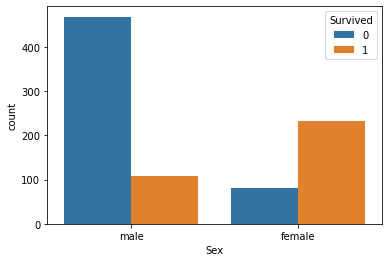

In [7]:
# Observed the relationship between surviced and sex
col_name = 'Sex'
sns.countplot(df_train[col_name], hue=df_train['Survived'])
display(df_train[[col_name, 'Survived']].groupby([col_name], as_index=False).mean().round(3))

uni_sex = sorted(df_train.Sex.unique())
dict_sex = { v: i for i, v in enumerate(uni_sex)}
print('Sex dict:', dict_sex)

# features = ['PassengerId', 'Sex', 'Survived']
# df_sex = df_train[features].copy()
# df_sex['Sex_code'] = df_train['Sex'].map(dict_sex).astype(int)
# display(df_sex.head())
df_train['Sex_code'] = df_train['Sex'].map(dict_sex).astype(int)
display(df_train.head())

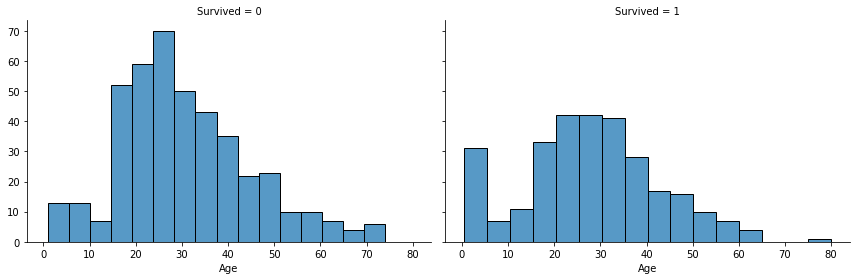

In [8]:
# Observed the relationship between surviced and sex
col_name = 'Age'
g = sns.FacetGrid(df_train, col='Survived', height=4, aspect=1.5)
g.map(sns.histplot, col_name, kde=False)

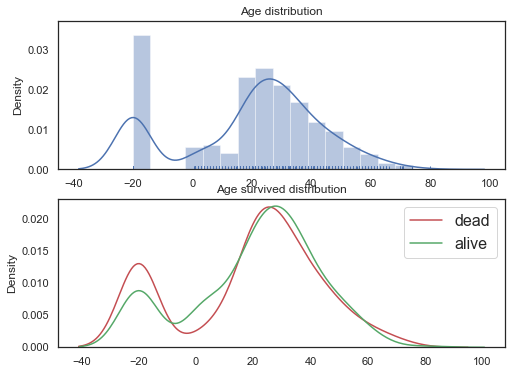

In [54]:
from scipy import stats

def plotDistribution(colname, df):
    fig, axes = plt.subplots(2,1,figsize=(8,6))
    sns.set_style('white')
    sns.distplot(df.Age.fillna(-20), rug=True, color='b', ax=axes[0])

    ax0 = axes[0]
    ax0.set_title('{} distribution'.format(colname))
    ax0.set_xlabel('')

    ax1 = axes[1]
    ax1.set_title('{} survived distribution'.format(colname))
    k1 = sns.distplot(df[df.Survived==0].Age.fillna(-20), hist=False, color='r', ax=ax1, label='dead')
    k2 = sns.distplot(df[df.Survived==1].Age.fillna(-20), hist=False, color='g', ax=ax1, label='alive')
    ax1.set_xlabel('')

    ax1.legend(fontsize=16)
    return 

plotDistribution('Age', df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Age          714 non-null    float64
 2   Survived     891 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 21.0 KB


None

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: age_cnt, Length: 88, dtype: int64

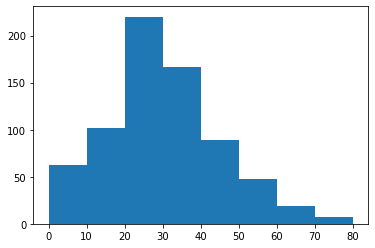

In [9]:
columns=['PassengerId', 'Age', 'Survived']
display(df_train[columns].info())
# display(df_train[columns].describe())

age_series = df_train.groupby('Age')['PassengerId'].size().rename('age_cnt')
display(age_series)

bins = [x for x in range(0, 81, 10)]
plt.hist(df_train['Age'], bins, histtype='bar', rwidth=1)
plt.show()

,SibSp,Survived
0,0,0.345
1,1,0.536
2,2,0.464
3,3,0.250
4,4,0.167
5,5,0.000
6,8,0.000


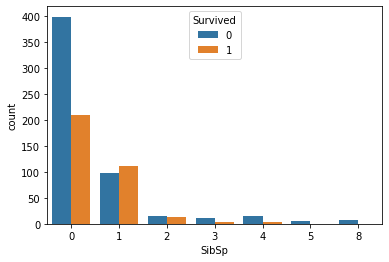

In [10]:
# Observed the relationship between surviced and SibSp (在船上同為兄弟姐妹或配偶的數目)
col_name = 'SibSp'
sns.countplot(df_train[col_name], hue=df_train['Survived'])
display(df_train[[col_name, 'Survived']].groupby([col_name], as_index=False).mean().round(3))

,Parch,Survived
0,0,0.344
1,1,0.551
2,2,0.500
3,3,0.600
4,4,0.000
5,5,0.200
6,6,0.000


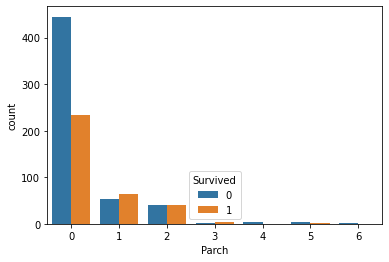

In [11]:
# Observed the relationship between surviced and Parch (在船上同為家族的父母及小孩的數目)
col_name = 'Parch'
sns.countplot(df_train[col_name], hue=df_train['Survived'])
display(df_train[[col_name, 'Survived']].groupby([col_name], as_index=False).mean().round(3))

,Ticket,Survived
0,110152,1.000
1,110413,0.667
2,110465,0.000
3,110564,1.000
4,110813,1.000
...,...,...
676,W./C. 6608,0.000
677,W./C. 6609,0.000
678,W.E.P. 5734,0.000
679,W/C 14208,0.000


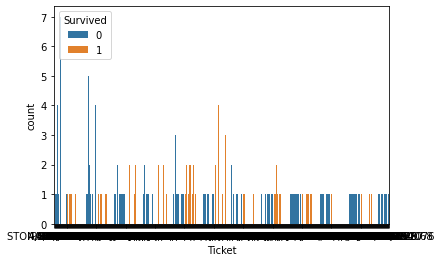

In [12]:
# Observed the relationship between surviced and Ticket
col_name = 'Ticket'
sns.countplot(df_train[col_name], hue=df_train['Survived'])
display(df_train[[col_name, 'Survived']].groupby([col_name], as_index=False).mean().round(3))

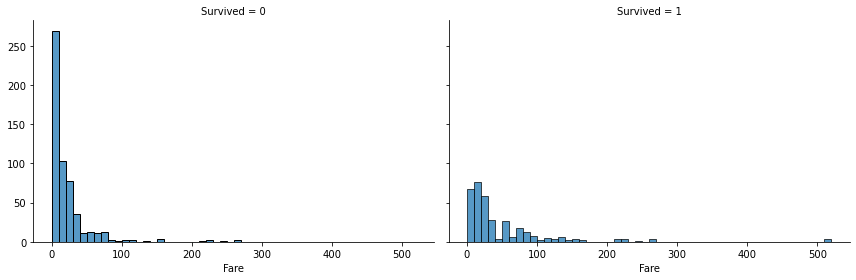

In [13]:
# Observed the relationship between surviced and Fare (船票價格)
col_name = 'Fare'
g = sns.FacetGrid(df_train, col='Survived', height=4, aspect=1.5)
g.map(sns.histplot, col_name, kde=False, binwidth=10)

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

,Cabin,Survived
0,A10,0.0
1,A14,0.0
2,A16,1.0
3,A19,0.0
4,A20,1.0
...,...,...
142,F33,1.0
143,F38,0.0
144,F4,1.0
145,G6,0.5


,PassengerId,Cabin,Cabin_0,Cabin_1,Cabin_2,Cabin_3
0,1,NaN,NaN,NaN,NaN,NaN
1,2,C85,C85,None,None,None
2,3,NaN,NaN,NaN,NaN,NaN
3,4,C123,C123,None,None,None
4,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
886,887,NaN,NaN,NaN,NaN,NaN
887,888,B42,B42,None,None,None
888,889,NaN,NaN,NaN,NaN,NaN
889,890,C148,C148,None,None,None


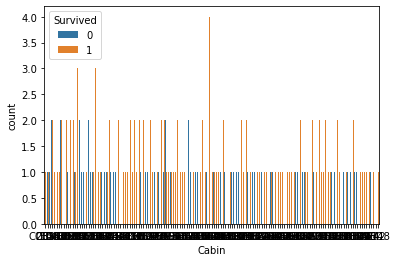

In [14]:
# Observed the relationship between surviced and Carbin (船艙號碼)
col_name = 'Cabin'
display(df_train[col_name].describe())

sns.countplot(df_train[col_name], hue=df_train['Survived'])
display(df_train[[col_name, 'Survived']].groupby([col_name], as_index=False).mean().round(3))

# Split Cabin column to multiple sub cabins
columns = ['PassengerId', 'Cabin']
df_cabins = df_train[columns].copy()
df_cabins = df_cabins.join(df_cabins['Cabin'].str.split(' ', expand=True).add_prefix('Cabin_'))
display(df_cabins)

,Embarked,Survived
0,C,0.554
1,Q,0.390
2,S,0.337


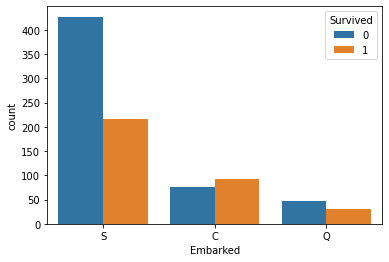

In [15]:
# Observed the relationship between surviced and Embarked (登船的口岸)
# C = Cherbourg, Q = Queenstown and S = Southampton
#
col_name = 'Embarked'
sns.countplot(df_train[col_name], hue=df_train['Survived'])
display(df_train[[col_name, 'Survived']].groupby([col_name], as_index=False).mean().round(3))

In [16]:
# Fill null embarked values
#
# print rows that embarked value is NaN
col_name = 'Embarked'
indexes = df_train[df_train[col_name].isnull()].index.tolist()
display(df_train.loc[indexes])

# old dataframe groupby column to create a new dataframe
# df_embark = df_train.groupby('Embarked')['PassengerId'].size().rename('count').reset_index()
# print(type(df_embark))

df_embark = df_train.groupby('Embarked')['PassengerId'].size().rename('count').reset_index()
display(df_embark)

embark_len = df_embark['count'].sum()
paseng_len = len(df_train['PassengerId'])
print('Embarked size:', embark_len)
print('Passenger size:', paseng_len)

# # The most people embarked from 'S', therefore set the null values as 'S'
df_train['Embarked'].fillna('S', inplace=True)

columns = ['PassengerId', 'Embarked']
print(); display(df_train[columns].info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_code
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


,Embarked,count
0,C,168
1,Q,77
2,S,644


Embarked size: 889
Passenger size: 891

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Embarked     891 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


None

In [17]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

features = ['Sex_code','Pclass']
inps = df_train.filter(features, axis=1)
lbls = df_train['Survived']
display(inps.info())

rf_model = RandomForestClassifier(
    random_state=2, n_estimators=250, min_samples_split=20, oob_score=True
)

rf_model.fit(inps, lbls)
print('oob score :%.5f' %(rf_model.oob_score_))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Sex_code  891 non-null    int32
 1   Pclass    891 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 10.6 KB


None

oob score :0.73176


In [18]:
# Prediction

# Convert Sex to Sex_code
f_abspath = join(DataPath, TestFile)
df_test = pd.read_csv(f_abspath)
df_test['Sex_code'] = df_test['Sex'].map(dict_sex).astype(int)


features = ['Sex_code','Pclass']
inps = df_test.filter(features, axis=1)
display(inps.info())

predis = rf_model.predict(inps)

df_res = pd.DataFrame({
    'PassengerId': df_test['PassengerId'].tolist(),
    'Survived': predis.astype(int)
})
display(df_res.info())

f_abspath = join(OutPath, 'Submission.csv')
df_res.to_csv(f_abspath, index=False)

print('done')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Sex_code  418 non-null    int32
 1   Pclass    418 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


None

done
